## How are in-demand skills trending for Data Analysts?

#### Methodology

- Aggregate skill counts monthly
- Re-analyze based on percentage of total jobs
- Plot the monthly skill demand

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_UAE = df[(df['job_country'] == 'United Arab Emirates') & (df['job_title_short'] == 'Data Analyst')].copy()

In [3]:
df_DA_UAE['job_posted_month_no'] = df_DA_UAE['job_posted_date'].dt.month

In [4]:
df_DA_UAE_explode = df_DA_UAE.explode('job_skills')

In [9]:
df_DA_UAE_pivot = df_DA_UAE_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_UAE_pivot.loc['Total'] = df_DA_UAE_pivot.sum()

df_DA_UAE_pivot = df_DA_UAE_pivot[df_DA_UAE_pivot.loc['Total'].sort_values(ascending=False).index] # you have to pass index as it's a series 

df_DA_UAE_pivot = df_DA_UAE_pivot.drop('Total')

df_DA_UAE_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,oracle,spss,...,fastapi,flask,crystal,opencv,phoenix,powershell,redhat,vb.net,vue,wsl
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,103,65,66,51,30,45,20,16,20,8,...,0,1,0,1,1,0,0,1,0,1
2,44,34,30,19,23,16,12,9,12,2,...,0,0,0,0,0,0,0,0,0,0
3,47,33,23,17,32,15,12,6,0,2,...,0,0,0,0,0,0,0,0,1,0
4,38,26,24,22,32,11,10,10,8,1,...,0,0,0,0,0,0,0,0,0,0
5,64,53,36,29,25,22,20,9,9,7,...,0,0,0,0,0,0,0,0,0,0
6,67,71,51,42,26,24,32,14,8,12,...,0,0,0,0,0,0,0,0,0,0
7,75,75,62,54,39,30,44,12,6,10,...,1,0,0,0,0,0,0,0,0,0
8,175,138,101,107,114,62,62,23,19,26,...,0,0,0,0,0,1,1,0,0,0
9,117,85,60,65,45,36,44,8,14,21,...,0,0,0,0,0,0,0,0,0,0


In [10]:
DA_totals = df_DA_UAE.groupby('job_posted_month_no').size()

DA_totals 

job_posted_month_no
1     254
2     126
3     112
4      92
5     124
6     184
7     233
8     449
9     258
10    359
11    201
12    195
dtype: int64

In [12]:
df_DA_UAE_percent = df_DA_UAE_pivot.div(DA_totals/100, axis=0)

df_DA_UAE_percent

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,oracle,spss,...,fastapi,flask,crystal,opencv,phoenix,powershell,redhat,vb.net,vue,wsl
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,40.551181,25.590551,25.984252,20.078740,11.811024,17.716535,7.874016,6.299213,7.874016,3.149606,...,0.000000,0.393701,0.000000,0.393701,0.393701,0.000000,0.000000,0.393701,0.000000,0.393701
2,34.920635,26.984127,23.809524,15.079365,18.253968,12.698413,9.523810,7.142857,9.523810,1.587302,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,41.964286,29.464286,20.535714,15.178571,28.571429,13.392857,10.714286,5.357143,0.000000,1.785714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.892857,0.000000
4,41.304348,28.260870,26.086957,23.913043,34.782609,11.956522,10.869565,10.869565,8.695652,1.086957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,51.612903,42.741935,29.032258,23.387097,20.161290,17.741935,16.129032,7.258065,7.258065,5.645161,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,36.413043,38.586957,27.717391,22.826087,14.130435,13.043478,17.391304,7.608696,4.347826,6.521739,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,32.188841,32.188841,26.609442,23.175966,16.738197,12.875536,18.884120,5.150215,2.575107,4.291845,...,0.429185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,38.975501,30.734967,22.494432,23.830735,25.389755,13.808463,13.808463,5.122494,4.231626,5.790646,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.222717,0.222717,0.000000,0.000000,0.000000
9,45.348837,32.945736,23.255814,25.193798,17.441860,13.953488,17.054264,3.100775,5.426357,8.139535,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [13]:
# change month number to month name
df_DA_UAE_percent = df_DA_UAE_percent.reset_index()
df_DA_UAE_percent['job_posted_month'] = df_DA_UAE_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_UAE_percent = df_DA_UAE_percent.set_index('job_posted_month')
df_DA_UAE_percent = df_DA_UAE_percent.drop(columns='job_posted_month_no')

df_DA_UAE_percent

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,oracle,spss,...,fastapi,flask,crystal,opencv,phoenix,powershell,redhat,vb.net,vue,wsl
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,40.551181,25.590551,25.984252,20.078740,11.811024,17.716535,7.874016,6.299213,7.874016,3.149606,...,0.000000,0.393701,0.000000,0.393701,0.393701,0.000000,0.000000,0.393701,0.000000,0.393701
Feb,34.920635,26.984127,23.809524,15.079365,18.253968,12.698413,9.523810,7.142857,9.523810,1.587302,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,41.964286,29.464286,20.535714,15.178571,28.571429,13.392857,10.714286,5.357143,0.000000,1.785714,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.892857,0.000000
Apr,41.304348,28.260870,26.086957,23.913043,34.782609,11.956522,10.869565,10.869565,8.695652,1.086957,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,51.612903,42.741935,29.032258,23.387097,20.161290,17.741935,16.129032,7.258065,7.258065,5.645161,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,36.413043,38.586957,27.717391,22.826087,14.130435,13.043478,17.391304,7.608696,4.347826,6.521739,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,32.188841,32.188841,26.609442,23.175966,16.738197,12.875536,18.884120,5.150215,2.575107,4.291845,...,0.429185,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,38.975501,30.734967,22.494432,23.830735,25.389755,13.808463,13.808463,5.122494,4.231626,5.790646,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.222717,0.222717,0.000000,0.000000,0.000000
Sep,45.348837,32.945736,23.255814,25.193798,17.441860,13.953488,17.054264,3.100775,5.426357,8.139535,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


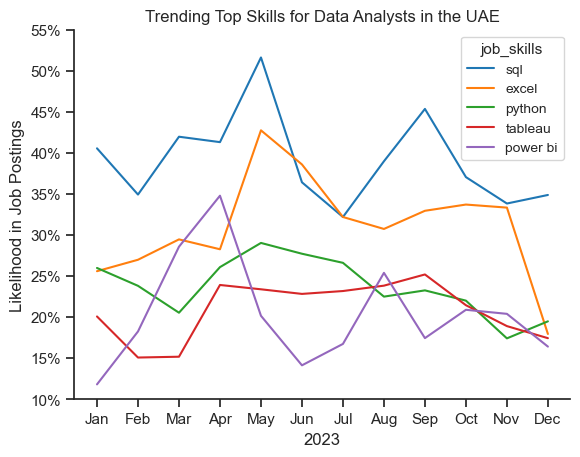

In [63]:
df_plot = df_DA_UAE_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the UAE')
plt.ylabel('Likelihood in Job Postings')
plt.xlabel('2023')
plt.ylim(10, 55)
plt.legend(title= 'job_skills', fontsize='small', title_fontsize=11)

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
